In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Normalize the dataset (scale pixel values to [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.7678 - loss: 0.6364 - val_accuracy: 0.8725 - val_loss: 0.3545
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8840 - loss: 0.3178 - val_accuracy: 0.8917 - val_loss: 0.2993
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9035 - loss: 0.2620 - val_accuracy: 0.8936 - val_loss: 0.2894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9138 - loss: 0.2272 - val_accuracy: 0.9033 - val_loss: 0.2662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9242 - loss: 0.1992 - val_accuracy: 0.9079 - val_loss: 0.2537
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9361 - loss: 0.1712 - val_accuracy: 0.9081 - val_loss: 0.2584
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9431 - loss: 0.1549 - val_accuracy: 0.9043 - val_loss: 0.2708
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9489 -

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9069 - loss: 0.3190
Test Accuracy: 0.9090999960899353


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [11]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

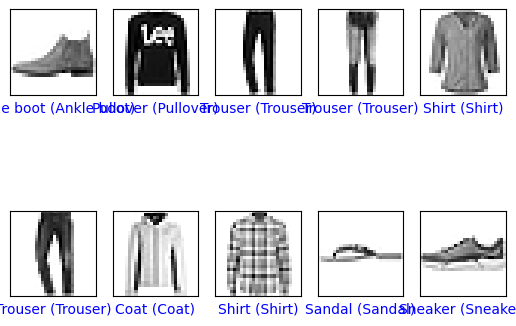

In [12]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.show()

In [13]:
from sklearn.metrics import classification_report

# Convert predicted probabilities to class labels
y_pred = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names)

print(report)


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.86      0.87      0.86      1000
       Dress       0.93      0.89      0.91      1000
        Coat       0.87      0.86      0.87      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.76      0.75      0.75      1000
     Sneaker       0.91      0.99      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.99      0.92      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

